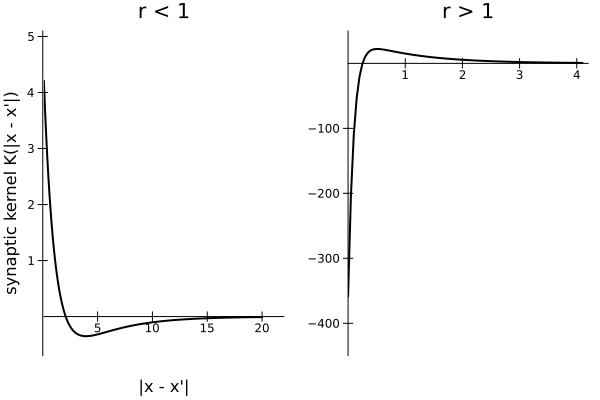

In [70]:
# How are the synaptic connections modeled, and what does this mean (Figure 3) ?
# The synaptic connections are modeled trough a synaptic kernel K(|x-x'|) that is function of the distance between the position of the two neurons.
# The function contains two exponential; the first one, ae*exp(-|x-x'|), represent the excitation, while the second term, ai*r*exp(-|x-x'|) the inhibition.
# r is the ratio of the range of the excitation to the range of the inhibition, while ae and ai are the strenght of the excitation or inhibition.
# Fixing ae and ai (in the paper ae > ai is set), by changing the value of the ratio r, the kernel can assume two important forms. 
# For r < 1, the range of the excitation is smaller the the one of the inhibition, so the kenel assume the form of a "mexican hat", 
# so the synaptic connection shows local excitation and a long-range (global) inhibition. This competition can induce Turing Instability, where the result are spatial patterns such as stripes or spots.
# For r > 1, the kernel represent local inhibition and global (lateral) excitation. 
# This configuration may produce other types of dynamic behavior, such as oscillations or traveling waves.
# It's important to note that the local inhibition is modeled as much stronger than the local excitation. However, by fixing the values of ae and ai,
# the behavior of the synaptic connection can be controlled just with the parameter r, which determine the spatial balance between excitation and inhibition.
# The exponential decay of both excitatory and inhibitory connections means that neurons influence each other less as their distance increases. 
# This kind of model mimics the short-range excitatory and long-range inhibitory properties seen in biological cortical networks.
using Plots

# Define a function for the synaptic kernel K(|x - x'|)
# r = re/ri
function synaptic_kernel(x, ae, ai, r)
    ex = exp.(-x)            
    return ae .* ex - ai .* r .* (ex .^ r)  
end

# r < 1
x1 = 0.:0.1:20.               # Define x range
ae1, ai1, r1 = 6., 5., 0.25   # Parameters
K1 = synaptic_kernel(x1, ae1, ai1, r1)
plot1 = plot(
    x1, K1,
    xlabel="|x - x'|", ylabel="synaptic kernel K(|x - x'|)",
    title="r < 1", color=:black, lw=2, grid=false, legend=false,
    xlims=(0.1, 22), ylims=(-0.7, 5.1), framestyle=:origin
)

# r > 1
x2 = 0.:0.05:4.1              # Define x range
ae2, ai2, r2 = 41., 40., 10.  # Parameters
K2 = synaptic_kernel(x2, ae2, ai2, r2)
plot2 = plot(
    x2, K2, legend=false,
    title="r > 1", color=:black, lw=2, grid=false,
    xlims=(0, 4.2), ylims=(-450, 50), framestyle=:origin
)

plot(plot1, plot2, layout=(1, 2))
